In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.info()
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

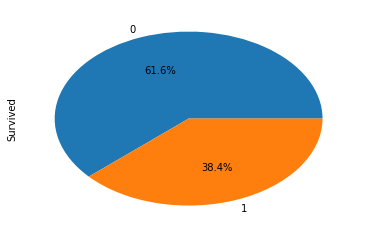

In [2]:
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

In [3]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

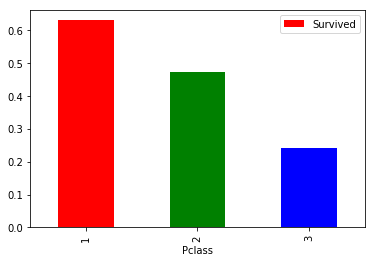

In [4]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(color=[['r','g','b']])

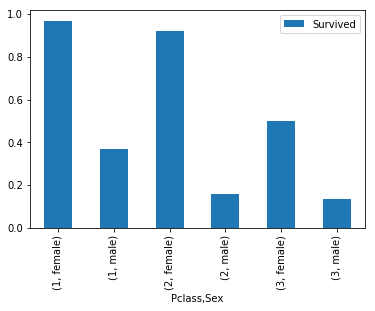

In [5]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [6]:
train_data.groupby(['Sex','Pclass','Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


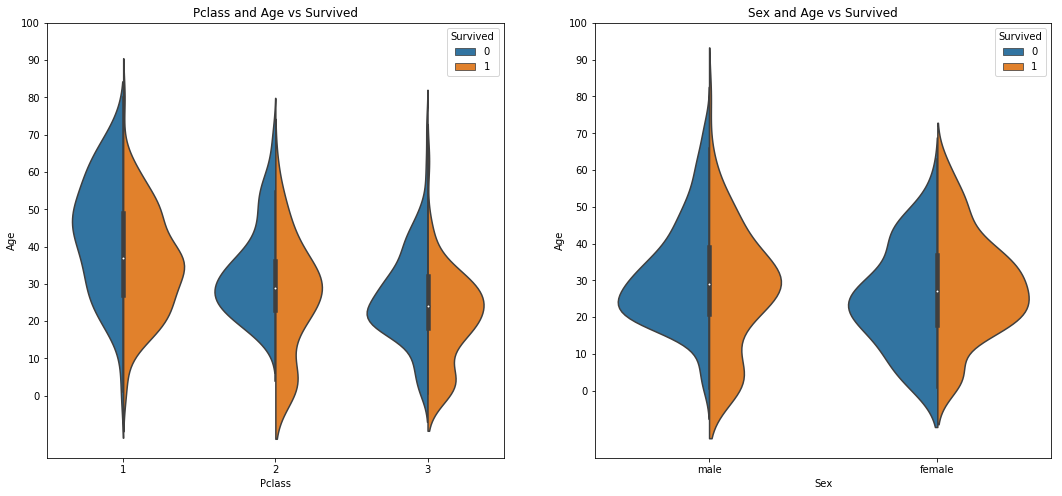

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Text(0.5,1,'Embarked and Survived')

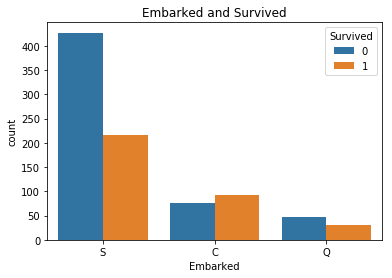

In [8]:
sns.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Embarked and Survived')

Text(0.5,1,'SibSp and Survived')

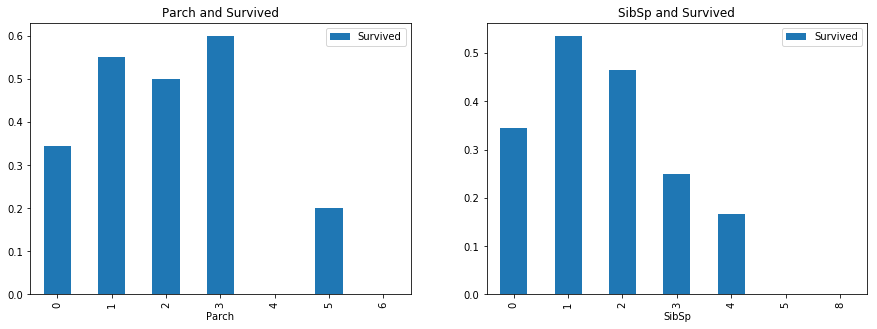

In [9]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

In [10]:
train_data_org = pd.read_csv('train.csv')
test_data_org = pd.read_csv('test.csv')
test_data_org['Survived'] = 0
combined_train_test = train_data_org.append(test_data_org)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [11]:
if combined_train_test['Embarked'].isnull().sum() != 0:
        combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)

In [12]:
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [13]:
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

In [14]:
combined_train_test['Title'] = combined_train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract( '^(.+?)\.', expand=False).str.strip()
# expand表示是否把series类型转化为DataFrame类型

In [15]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master'], 'Master'))

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

In [16]:
title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)

In [17]:
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_S,Sex_female,Sex_male,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,0,1,Mr,0,0,1,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,1,0,Mrs,0,0,0,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,1,0,Miss,0,1,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,1,1,0,Mrs,0,0,0,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,1,0,1,Mr,0,0,1,0,0,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,...,0,0,1,Mr,0,0,1,0,0,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,1,0,1,Mr,0,0,1,0,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,1,0,1,Master,1,0,0,0,0,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,1,1,0,Mrs,0,0,0,1,0,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,1,0,Mrs,0,0,0,1,0,0


In [18]:
if combined_train_test['Fare'].isnull().sum() != 0:
        combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform('mean'))

In [19]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [20]:
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_S,Sex_female,Sex_male,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,0,1,Mr,0,0,1,0,0,0
1,38.0,C85,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,1,0,Mrs,0,0,0,1,0,0
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,1,0,Miss,0,1,0,0,0,0
3,35.0,C123,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,1,1,0,Mrs,0,0,0,1,0,0
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,1,0,1,Mr,0,0,1,0,0,0
5,NaN,NaN,Q,8.458300,"Moran, Mr. James",0,6,3,male,0,...,0,0,1,Mr,0,0,1,0,0,0
6,54.0,E46,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,1,0,1,Mr,0,0,1,0,0,0
7,2.0,NaN,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,1,0,1,Master,1,0,0,0,0,0
8,27.0,NaN,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,1,1,0,Mrs,0,0,0,1,0,0
9,14.0,NaN,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,1,0,Mrs,0,0,0,1,0,0


In [21]:
def fare_category(fare):
        if fare <= 4:
            return 0
        elif fare <= 10:
            return 1
        elif fare <= 30:
            return 2
        elif fare <= 45:
            return 3
        else:
            return 4
combined_train_test['Fare_Category'] = combined_train_test['Fare'].map(fare_category)

In [22]:
fare_cat_dummies_df = pd.get_dummies(combined_train_test['Fare_Category'],prefix=combined_train_test[['Fare_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, fare_cat_dummies_df], axis=1)

In [23]:
#---Pclass字段---建立PCalss Fare Category
from sklearn import preprocessing
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare,pclass3_mean_fare):
    if df['Pclass']==1:
        if df['Fare']<=pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass']==2:
        if df['Fare']<=pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass']==3:
        if df['Fare']<=pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'
Pclass_1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass_2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass_3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]
# 建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args=(Pclass_1_mean_fare, Pclass_2_mean_fare, Pclass_3_mean_fare), axis=1)
p_fare = preprocessing.LabelEncoder()
p_fare.fit(np.array(['Pclass_1_Low_Fare', 'Pclass_1_High_Fare', 'Pclass_2_Low_Fare', 'Pclass_2_High_Fare', 'Pclass_3_Low_Fare','Pclass_3_High_Fare']))#给每一项添加标签
combined_train_test['Pclass_Fare_Category'] = p_fare.fit_transform(combined_train_test['Pclass_Fare_Category'])#转换成数值

In [24]:
#先对sibsp和parch创建有序编码family_size_c，family_size_c是值为‘single’,'small','large'的特征变量
def family_size_category(family_size):
    if family_size<=1:
        return 'single'
    elif family_size<=3:
        return 'small'
    else:
        return 'large'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)
le_family = preprocessing.LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.fit_transform(combined_train_test['Family_Size_Category'])
fam_size_cat_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                             prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, fam_size_cat_dummies_df], axis=1)

In [25]:
missing_age_df = pd.DataFrame(combined_train_test[['Age', 'Parch', 'Sex', 'SibSp', 'Family_Size', 'Family_Size_Category',
                             'Title', 'Fare', 'Fare_Category', 'Pclass', 'Embarked']])
missing_age_df = pd.get_dummies(missing_age_df,columns=['Title', 'Family_Size_Category', 'Fare_Category', 'Sex', 'Pclass' ,'Embarked'])
missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

In [26]:
def fill_missing_age(missing_age_train, missing_age_test):
        missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
        missing_age_Y_train = missing_age_train['Age']
        missing_age_X_test = missing_age_test.drop(['Age'], axis=1)
        #模型1
        gbm_reg = ensemble.GradientBoostingRegressor(random_state=42)
        gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [3],'learning_rate': [0.01], 'max_features': [3]}
        gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1,  scoring='neg_mean_squared_error')
        gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
        print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
        print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
        print('GB Train Error for "Age" Feature Regressor:'+ str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
        missing_age_test['Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
        print(missing_age_test['Age_GB'][:4])
        #模型2
        lrf_reg = LinearRegression()
        lrf_reg_param_grid = {'fit_intercept': [True], 'normalize': [True]}
        lrf_reg_grid = model_selection.GridSearchCV(lrf_reg, lrf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
        lrf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
        print('Age feature Best LR Params:' + str(lrf_reg_grid.best_params_))
        print('Age feature Best LR Score:' + str(lrf_reg_grid.best_score_))
        print('LR Train Error for "Age" Feature Regressor' + str(lrf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
        missing_age_test['Age_LRF'] = lrf_reg_grid.predict(missing_age_X_test)
        print(missing_age_test['Age_LRF'][:4])
       #将两个模型预测后的均值作为最终预测结果
        print('shape1',missing_age_test['Age'].shape,missing_age_test[['Age_GB','Age_LRF']].mode(axis=1).shape)
        #missing_age_test['Age'] = missing_age_test[['Age_GB','Age_LRF']].mode(axis=1)
        
        missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_LRF']])
        print(missing_age_test['Age'][:4])
        
        #做了标准化以后，数据会变成np.array格式，这里再做一次转换
        missing_age_test = pd.DataFrame(missing_age_test)
        missing_age_test.drop(['Age_GB', 'Age_LRF'], axis=1, inplace=True)

        return missing_age_test

In [27]:
from time import time
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train,missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   15.2s remaining:   15.2s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   23.4s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-112.9019185947226
GB Train Error for "Age" Feature Regressor:-91.57365104869234
5     33.625384
17    33.216675
19    33.120653
26    26.608875
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   11.0s remaining:   11.0s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   16.5s finished


Age feature Best LR Params:{'fit_intercept': True, 'normalize': True}
Age feature Best LR Score:-119.08579074818152
LR Train Error for "Age" Feature Regressor-114.86991950585565
5     34.28125
17    32.96875
19    30.81250
26    26.75000
Name: Age_LRF, dtype: float64
shape1 (263,) (263, 2)
5     29.499839
17    29.499839
19    29.499839
26    29.499839
Name: Age, dtype: float64


In [29]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
# 在ndarray中显示时 np.nan会显示nan，如果进行计算 结果会显示为NAN
# x.isnumeric()判断表达式的运算结果是否为数字，返回 Boolean 值（True or False）
combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x,errors='coerce'))
# pd.to_numeric可以将其它形式的数据转换成整数型的数据. 
# pandas数据转换时遇到不能转换的数据转为NaN的参数设置errors='coerce'
combined_train_test['Ticket_Number'].fillna(0,inplace=True)
combined_train_test = pd.get_dummies(combined_train_test,columns=['Ticket','Ticket_Letter'])

In [30]:
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket_Letter_SOTON/O2,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P
0,22.000000,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,0,0,0,0,0,0,0,0,0,0
1,38.000000,C85,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,0,0,0,0,0,0,0,0,0
2,26.000000,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,0,0,0,1,0,0,0,0,0,0
3,35.000000,C123,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,0,0,0,0,0,0,0,0,0
4,35.000000,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,0,0,0,0,0,0,0,0,0,0
5,29.499839,NaN,Q,8.458300,"Moran, Mr. James",0,6,3,male,0,...,0,0,0,0,0,0,0,0,0,0
6,54.000000,E46,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,0,0,0,0,0,0,0,0,0,0
7,2.000000,NaN,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,0,0,0,0,0,0,0,0,0,0
8,27.000000,NaN,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,0,0,0,0,0,0,0,0,0,0
9,14.000000,NaN,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
combined_train_test['Cabin_Letter'] = combined_train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
combined_train_test = pd.get_dummies(combined_train_test,columns=['Cabin','Cabin_Letter'])

In [32]:
combined_train_test

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,...,Cabin_G6,Cabin_T,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T
0,22.000000,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.000000,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,...,0,0,0,0,1,0,0,0,0,0
2,26.000000,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,...,0,0,0,0,0,0,0,0,0,0
3,35.000000,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,...,0,0,0,0,1,0,0,0,0,0
4,35.000000,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29.499839,Q,8.458300,"Moran, Mr. James",0,6,3,male,0,0,...,0,0,0,0,0,0,0,0,0,0
6,54.000000,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2.000000,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,...,0,0,0,0,0,0,0,0,0,0
8,27.000000,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,...,0,0,0,0,0,0,0,0,0,0
9,14.000000,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# pd.options.display.max_info_columns = 200  # 设置info中信息显示数量为200

# 或者是

# pd.set_option("display.max_info_columns", 200)   # 设置info中信息显示数量为200

#显示所有列
# pd.set_option('display.max_columns', None)
# df.info(verbose=True)

In [34]:
# pd.options.display.max_info_columns = 200
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1208 columns):
Age                          float64
Embarked                     object
Fare                         float64
Name                         object
Parch                        int64
PassengerId                  int64
Pclass                       int64
Sex                          object
SibSp                        int64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title                        object
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Cate

In [35]:
combined_train_test = combined_train_test.drop('Embarked',axis=1,inplace=False) 

In [36]:
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1207 columns):
Age                          float64
Fare                         float64
Name                         object
Parch                        int64
PassengerId                  int64
Pclass                       int64
Sex                          object
SibSp                        int64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title                        object
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Categ

In [37]:
combined_train_test = combined_train_test.drop(['Name', 'Sex'],axis=1,inplace=False) 

In [38]:
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1205 columns):
Age                          float64
Fare                         float64
Parch                        int64
PassengerId                  int64
Pclass                       int64
SibSp                        int64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title                        object
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Category_3              uint8
Fare_Category_4              uint8
Pclass_Fare_

In [39]:
def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):
        # 随机森林
        rf_est = RandomForestClassifier(random_state=42)
        rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
        rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
        rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
        #将feature按Importance排序
        feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
        features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
        print('Sample 25 Features from RF Classifier')
        print(str(features_top_n_rf[:25]))

        # AdaBoost
        ada_est = ensemble.AdaBoostClassifier(random_state=42)
        ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.5, 0.6]}
        ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
        ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
        #排序
        feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),'importance': ada_grid.best_estimator_.feature_importances_}).sort_values( 'importance', ascending=False)
        features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']

        # ExtraTree
        et_est = ensemble.ExtraTreesClassifier(random_state=42)
        et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [15]}
        et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
        et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
        #排序
        feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
        features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
        print('Sample 25 Features from ET Classifier:')
        print(str(features_top_n_et[:25]))

        # 将三个模型挑选出来的前features_top_n_et合并
        features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et], ignore_index=True).drop_duplicates()

        return features_top_n

In [40]:
combined_train_test = combined_train_test.drop(['Title'],axis=1,inplace=False) 
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1204 columns):
Age                          float64
Fare                         float64
Parch                        int64
PassengerId                  int64
Pclass                       int64
SibSp                        int64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Category_3              uint8
Fare_Category_4              uint8
Pclass_Fare_Category         int64
Family_Size  

In [41]:
combined_train_test = combined_train_test.drop(['Fare', 'Parch', 'SibSp'],axis=1,inplace=False) 
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1201 columns):
Age                          float64
PassengerId                  int64
Pclass                       int64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Category_3              uint8
Fare_Category_4              uint8
Pclass_Fare_Category         int64
Family_Size                  int64
Family_Size_Category         int64
Family_Size_Category_0       uint8
Family_Size_Cat

In [42]:
combined_train_test = combined_train_test.drop(['PassengerId'],axis=1,inplace=False) 
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1200 columns):
Age                          float64
Pclass                       int64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Category_3              uint8
Fare_Category_4              uint8
Pclass_Fare_Category         int64
Family_Size                  int64
Family_Size_Category         int64
Family_Size_Category_0       uint8
Family_Size_Category_1       uint8
Family_Size_Cat

In [43]:
combined_train_test = combined_train_test.drop(['Pclass'],axis=1,inplace=False) 
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1199 columns):
Age                          float64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Category_3              uint8
Fare_Category_4              uint8
Pclass_Fare_Category         int64
Family_Size                  int64
Family_Size_Category         int64
Family_Size_Category_0       uint8
Family_Size_Category_1       uint8
Family_Size_Category_2       uint8
Ticket_Number  

In [44]:
combined_train_test = combined_train_test.drop(['Ticket_Number'],axis=1,inplace=False) 
combined_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1198 columns):
Age                          float64
Survived                     int64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Category_3              uint8
Fare_Category_4              uint8
Pclass_Fare_Category         int64
Family_Size                  int64
Family_Size_Category         int64
Family_Size_Category_0       uint8
Family_Size_Category_1       uint8
Family_Size_Category_2       uint8
Ticket_110152  

In [45]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [46]:
titanic_train_data_X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 1197 columns):
Age                          float64
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Sex_female                   uint8
Sex_male                     uint8
Title_Master                 uint8
Title_Miss                   uint8
Title_Mr                     uint8
Title_Mrs                    uint8
Title_Officer                uint8
Title_Royalty                uint8
Fare_Category                int64
Fare_Category_0              uint8
Fare_Category_1              uint8
Fare_Category_2              uint8
Fare_Category_3              uint8
Fare_Category_4              uint8
Pclass_Fare_Category         int64
Family_Size                  int64
Family_Size_Category         int64
Family_Size_Category_0       uint8
Family_Size_Category_1       uint8
Family_Size_Category_2       uint8
Ticket_110152                uint8
Ticket_110413   

In [47]:
feature_to_pick = 250
feature_top_n = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
titanic_train_data_X = titanic_train_data_X[feature_top_n]
# del titanic_train_data_X['Ticket_Number']#后来发现删除Ticket_Number后效果更好了
titanic_test_data_X = titanic_test_data_X[feature_top_n]
# del titanic_test_data_X['Ticket_Number']

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   34.7s remaining:   18.6s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   47.8s finished


Sample 25 Features from RF Classifier
4                   Sex_female
8                     Title_Mr
5                     Sex_male
18        Pclass_Fare_Category
0                          Age
7                   Title_Miss
9                    Title_Mrs
19                 Family_Size
12               Fare_Category
14             Fare_Category_1
20        Family_Size_Category
23      Family_Size_Category_2
15             Fare_Category_2
22      Family_Size_Category_1
6                 Title_Master
1                   Embarked_C
3                   Embarked_S
1190            Cabin_Letter_B
1193            Cabin_Letter_E
21      Family_Size_Category_0
1192            Cabin_Letter_D
975           Ticket_Letter_PC
128                Ticket_1601
1191            Cabin_Letter_C
16             Fare_Category_3
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   59.1s remaining:   31.8s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  1.3min finished


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   31.8s remaining:   17.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   43.6s finished


Sample 25 Features from ET Classifier:
8                     Title_Mr
5                     Sex_male
4                   Sex_female
7                   Title_Miss
9                    Title_Mrs
14             Fare_Category_1
18        Pclass_Fare_Category
23      Family_Size_Category_2
15             Fare_Category_2
20        Family_Size_Category
22      Family_Size_Category_1
6                 Title_Master
12               Fare_Category
19                 Family_Size
1193            Cabin_Letter_E
1                   Embarked_C
0                          Age
3                   Embarked_S
1190            Cabin_Letter_B
21      Family_Size_Category_0
1192            Cabin_Letter_D
16             Fare_Category_3
975           Ticket_Letter_PC
1191            Cabin_Letter_C
17             Fare_Category_4
Name: feature, dtype: object


In [48]:
np.any(np.isnan(titanic_train_data_X))

Sex_female                False
Title_Mr                  False
Sex_male                  False
Pclass_Fare_Category      False
Age                       False
Title_Miss                False
Title_Mrs                 False
Family_Size               False
Fare_Category             False
Fare_Category_1           False
Family_Size_Category      False
Family_Size_Category_2    False
Fare_Category_2           False
Family_Size_Category_1    False
Title_Master              False
Embarked_C                False
Embarked_S                False
Cabin_Letter_B            False
Cabin_Letter_E            False
Family_Size_Category_0    False
Cabin_Letter_D            False
Ticket_Letter_PC          False
Ticket_1601               False
Cabin_Letter_C            False
Fare_Category_3           False
Embarked_Q                False
Ticket_347077             False
Title_Officer             False
Fare_Category_4           False
Ticket_Letter_C.A.        False
                          ...  
Ticket_P

In [49]:
rf_est = ensemble.RandomForestClassifier(n_estimators = 750, criterion = 'gini', max_features = 'sqrt',
                                             max_depth = 3, min_samples_split = 4, min_samples_leaf = 2,
                                             n_jobs = 50, random_state = 42, verbose = 1)
gbm_est = ensemble.GradientBoostingClassifier(n_estimators=900, learning_rate=0.0008, loss='exponential',
                                                  min_samples_split=3, min_samples_leaf=2, max_features='sqrt',
                                                  max_depth=3, random_state=42, verbose=1)
et_est = ensemble.ExtraTreesClassifier(n_estimators=750, max_features='sqrt', max_depth=35, n_jobs=50,
                                           criterion='entropy', random_state=42, verbose=1)
voting_est = ensemble.VotingClassifier(estimators = [('rf', rf_est),('gbm', gbm_est),('et', et_est)],
                                       voting = 'soft', weights = [3,5,2],
                                       n_jobs = 50)
voting_est.fit(titanic_train_data_X,titanic_train_data_Y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weigh...timators=750, n_jobs=50,
           oob_score=False, random_state=42, verbose=1, warm_start=False))],
         flatten_transform=None, n_jobs=50, voting='soft',
         weights=[3, 5, 2])

In [50]:
titanic_test_data_X['Survived'] = voting_est.predict(titanic_test_data_X)
submission = pd.DataFrame({'PassengerId':test_data_org.loc[:,'PassengerId'],
                               'Survived':titanic_test_data_X.loc[:,'Survived']})
submission.to_csv('submission_result.csv',index=False,sep=',')

[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.2s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.4s finished
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.1s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.3s finished
